In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/results.csv', encoding='latin1')
df.head()

,advertisement.transcription,advertiser.name,enslaved_person.gender,enslaved_person.min_birth_year,enslaved_person.max_birth_year,enslaved_person.literacy,enslaved_person.skills,enslaved_person_languages.language_id,enslaved_person_languages.does_speak,enslaved_person_name.fullname,...,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,enslaved_person_name.id,runaway_location.id,runaway_location_location.id,runaway_enslavers.id,enslaver.id,runaway_reward.id
0,TWENTY DOLLARS REWARD.\nRanaway from the Subsc...,NaN,FEMALE,NaN,NaN,NOT_PROVIDED,nurse,NaN,NaN,Tenah,...,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,4bfe8d11-72d9-40f9-812c-33a8de72bf42,1a9753b6-120c-4520-9f28-f29b42b15434,18ef9311-02fd-402d-8d07-7b7d8567806c,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,30efbcb3-23c1-48f5-a349-c34daea5d1fb
1,TWENTY DOLLARS REWARD.\nRanaway from the Subsc...,NaN,FEMALE,NaN,NaN,NOT_PROVIDED,nurse,NaN,NaN,Tenah,...,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,4bfe8d11-72d9-40f9-812c-33a8de72bf42,1a9753b6-120c-4520-9f28-f29b42b15434,18ef9311-02fd-402d-8d07-7b7d8567806c,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
2,TWENTY DOLLARS REWARD.\nRanaway from the Subsc...,NaN,FEMALE,NaN,NaN,NOT_PROVIDED,nurse,NaN,NaN,Tenah,...,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,4bfe8d11-72d9-40f9-812c-33a8de72bf42,94d1b273-fbf4-404b-88e9-e6301cf9a5d0,fbfd2f31-4ad1-4bb4-a0cb-c27155ac6e66,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,30efbcb3-23c1-48f5-a349-c34daea5d1fb
3,TWENTY DOLLARS REWARD.\nRanaway from the Subsc...,NaN,FEMALE,NaN,NaN,NOT_PROVIDED,nurse,NaN,NaN,Tenah,...,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,4bfe8d11-72d9-40f9-812c-33a8de72bf42,94d1b273-fbf4-404b-88e9-e6301cf9a5d0,fbfd2f31-4ad1-4bb4-a0cb-c27155ac6e66,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
4,TWENTY DOLLARS REWARD.\nRanaway from the Subsc...,NaN,FEMALE,NaN,NaN,NOT_PROVIDED,nurse,NaN,NaN,Tenah,...,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,4bfe8d11-72d9-40f9-812c-33a8de72bf42,68ef4c2a-da28-44d2-a17c-35cd6b364a66,824497c1-56d0-4310-a9f1-d5e63c75006f,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,30efbcb3-23c1-48f5-a349-c34daea5d1fb


In [3]:
#rename columns with underscores for ease of use
new_cols = []
for c in df.columns.values:
    new_cols.append(c.replace('.', '_'))
df.columns = new_cols

In [4]:
df.describe()

,enslaved_person_min_birth_year,enslaved_person_max_birth_year,runaway_min_age,runaway_max_age,runaway_min_height,runaway_max_height,runaway_min_weight,runaway_max_weight,runaway_enslavers_enslaver_status,runaway_reward_amount
count,0.0,0.0,18250.000000,18250.000000,18143.000000,18143.000000,17551.000000,17551.000000,0.0,13974.000000
mean,NaN,NaN,15.514137,16.255616,32.730640,33.286336,-2.074070,-1.873910,NaN,60.536711
std,NaN,NaN,18.882923,19.696801,37.877267,38.416593,32.758832,33.740506,NaN,224.179629
min,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,NaN,1.000000
25%,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,NaN,10.000000
50%,NaN,NaN,22.000000,22.000000,62.000000,62.000000,-9.000000,-9.000000,NaN,25.000000
75%,NaN,NaN,28.000000,30.000000,68.000000,68.000000,-9.000000,-9.000000,NaN,50.000000
max,NaN,NaN,501.000000,501.000000,213.000000,213.000000,200.000000,300.000000,NaN,10000.000000


In [5]:
#drop columns with little/no data. -9 seems to be no entry value, replace with nan
drop_cols= ['enslaved_person_min_birth_year', 'enslaved_person_max_birth_year', 'runaway_enslavers_enslaver_status']
df.drop(drop_cols, axis = 1, inplace = True)
_ = df.replace(-9, np.nan, inplace = True)

In [6]:
df.describe()

,runaway_min_age,runaway_max_age,runaway_min_height,runaway_max_height,runaway_min_weight,runaway_max_weight,runaway_reward_amount
count,12636.000000,12636.000000,9999.000000,9999.000000,764.000000,764.000000,13974.000000
mean,26.405429,27.476337,66.719472,67.727773,150.106021,154.704188,60.536711
std,11.373335,12.289078,5.427403,5.925852,20.955874,22.783934,224.179629
min,1.000000,1.000000,4.000000,5.000000,5.000000,9.000000,1.000000
25%,21.000000,22.000000,65.000000,66.000000,140.000000,140.000000,10.000000
50%,25.000000,25.000000,67.000000,68.000000,145.000000,150.000000,25.000000
75%,30.000000,30.000000,69.000000,70.000000,165.000000,170.000000,50.000000
max,501.000000,501.000000,213.000000,213.000000,200.000000,300.000000,10000.000000


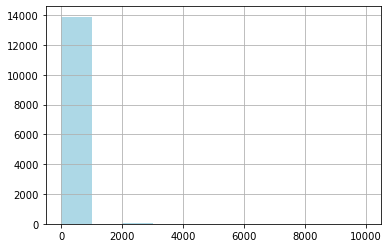

In [7]:
df['runaway_reward_amount'].hist(color = 'lightblue');

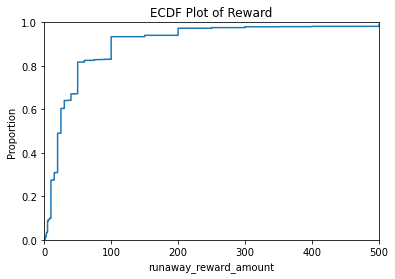

In [8]:
plt.title('ECDF Plot of Reward')
plt.xlim(0, 500)
sns.ecdfplot(data=df, x="runaway_reward_amount");

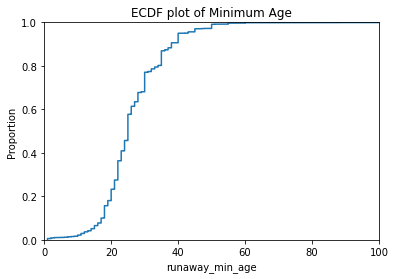

In [9]:
plt.title('ECDF plot of Minimum Age')
plt.xlim(0, 100)
sns.ecdfplot(data=df, x="runaway_min_age");

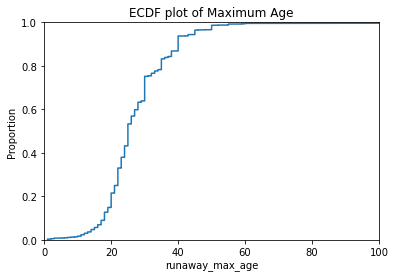

In [10]:
plt.title('ECDF plot of Maximum Age')
plt.xlim(0, 100)
sns.ecdfplot(data=df, x="runaway_max_age");

In [11]:
max_values = {'runaway_min_age': 100,
              'runaway_max_age': 100,
              'runaway_min_height': 90,
              'runaway_max_height': 90,
              'runaway_min_weight': 250,
              'runaway_max_weight': 350,
              'runaway_reward_amount': 300}

In [12]:
min_values = {'runaway_min_age': 0,
              'runaway_max_age': 0,
              'runaway_min_height': 24,
              'runaway_max_height': 24,
              'runaway_min_weight': 50,
              'runaway_max_weight': 50
             }

In [13]:
#drop rows with data out of range: age, height, weight
idxs_to_drop = []
idxs = []
for k,v in max_values.items():
    t = idxs.append(df.query('{} > {}' .format(k,v)).index.values)
for k,v in min_values.items():
    idxs.append(df.query('{} < {}' .format(k,v)).index.values)
for i in idxs:
    for j in i:
        if j not in idxs_to_drop:
            idxs_to_drop.append(j)
print(len(idxs_to_drop))

384


In [14]:
df.drop(idxs_to_drop, inplace = True)

In [15]:
df.describe()

,runaway_min_age,runaway_max_age,runaway_min_height,runaway_max_height,runaway_min_weight,runaway_max_weight,runaway_reward_amount
count,12361.000000,12361.000000,9757.000000,9757.000000,755.000000,755.000000,13611.000000
mean,26.248928,27.283634,66.780773,67.397561,150.358940,155.001325,40.345089
std,8.882891,9.953287,4.093742,4.204915,19.624517,21.600085,46.453543
min,1.000000,1.000000,36.000000,36.000000,60.000000,60.000000,1.000000
25%,21.000000,21.000000,65.000000,65.000000,140.000000,140.000000,10.000000
50%,25.000000,25.000000,67.000000,68.000000,145.000000,150.000000,25.000000
75%,30.000000,30.000000,69.000000,70.000000,164.000000,170.000000,50.000000
max,95.000000,100.000000,83.000000,84.000000,200.000000,300.000000,300.000000


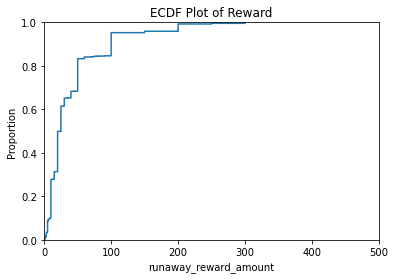

In [16]:
plt.title('ECDF Plot of Reward')
plt.xlim(0, 500)
sns.ecdfplot(data=df, x="runaway_reward_amount");

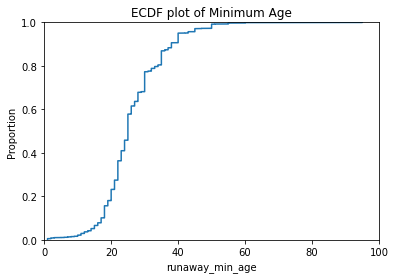

In [17]:
plt.title('ECDF plot of Minimum Age')
plt.xlim(0, 100)
sns.ecdfplot(data=df, x="runaway_min_age");

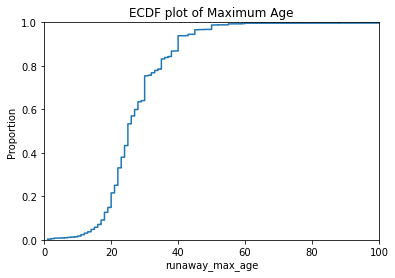

In [18]:
plt.title('ECDF plot of Maximum Age')
plt.xlim(0, 100)
sns.ecdfplot(data=df, x="runaway_max_age");

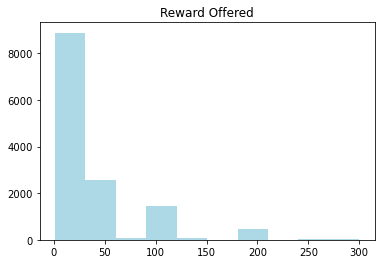

In [19]:
#plot rewards
plt.title('Reward Offered')
plt.hist(df.runaway_reward_amount, color = 'lightblue');

In [20]:
def get_len(x):
    try:
        t_len = len(x.split(' '))
    except:
        t_len = 0
    return t_len
len_texts = df['advertisement_transcription'][:].apply(lambda x: get_len(x))
df['len'] = np.array(len_texts)

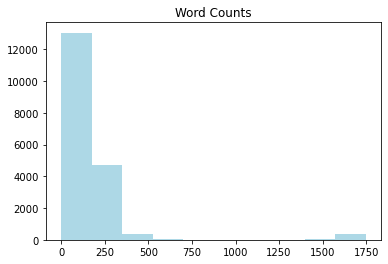

In [21]:
#word count in texts
plt.title('Word Counts')
plt.hist(df.len, color = 'lightblue');

In [22]:
len(df.query('len <= 383')['advertisement_id'].unique())

4935

In [23]:
enslaved_count = []
for unique_ad in df['advertisement_id'].unique():
    t_df = df.query('advertisement_id == "{}"' .format(unique_ad))['enslaved_person_id']
    if len(t_df.unique()) > 1:
        enslaved_count.append(unique_ad)

In [24]:
def has_multiple(x):
    t_mult = 0
    if x in enslaved_count:
        t_mult = 1
    return t_mult

df['multiple_persons'] = df['advertisement_id'].apply(lambda x: has_multiple(x))

In [25]:
df = df.query('multiple_persons == 0')

In [26]:
df.columns

Index(['advertisement_transcription', 'advertiser_name',
       'enslaved_person_gender', 'enslaved_person_literacy',
       'enslaved_person_skills', 'enslaved_person_languages_language_id',
       'enslaved_person_languages_does_speak', 'enslaved_person_name_fullname',
       'enslaver_fullname', 'enslaver_gender', 'newspaper_name',
       'runaway_ran_before', 'runaway_profess_freedom',
       'runaway_approximate_age', 'runaway_min_age', 'runaway_max_age',
       'runaway_racial_description', 'runaway_ethnic_description',
       'runaway_approximate_height', 'runaway_min_height',
       'runaway_max_height', 'runaway_approximate_weight',
       'runaway_min_weight', 'runaway_max_weight', 'runaway_injuries_scars',
       'runaway_self_presentation', 'runaway_other_physical_descriptions',
       'runaway_possessions', 'runaway_reward_amount',
       'runaway_reward_currency', 'runaway_reward_criteria',
       'runaway_location_location_id', 'runaway_location_type',
       'runaway_lo

In [27]:
id_cols = ['enslaved_person_languages_language_id', 'runaway_location_location_id',\
           'advertiser_id', 'newspaper_id', 'runaway_event_id', 'runaway_id', 'enslaved_person_id',\
           'enslaved_person_languages_id', 'enslaved_person_name_id', 'runaway_location_id',\
           'runaway_location_location_id', 'runaway_enslavers_id', 'enslaver_id','runaway_reward_id']

In [28]:
df.drop(id_cols, axis = 1, inplace = True)

In [29]:
df.describe()

,runaway_min_age,runaway_max_age,runaway_min_height,runaway_max_height,runaway_min_weight,runaway_max_weight,runaway_reward_amount,len,multiple_persons
count,8210.000000,8210.000000,6853.000000,6853.000000,643.000000,643.000000,9037.000000,11568.000000,11568.0
mean,26.794519,27.800365,66.693273,67.301912,149.379471,153.858476,38.935487,146.199084,0.0
std,8.650327,9.626006,4.135533,4.222821,17.920794,20.430572,45.532922,120.296608,0.0
min,1.000000,1.000000,36.000000,36.000000,60.000000,100.000000,1.000000,0.000000,0.0
25%,21.000000,22.000000,65.000000,65.000000,140.000000,140.000000,10.000000,92.000000,0.0
50%,25.000000,25.000000,67.000000,68.000000,145.000000,145.000000,20.000000,124.000000,0.0
75%,30.000000,32.000000,69.000000,70.000000,160.000000,165.000000,50.000000,170.000000,0.0
max,95.000000,100.000000,83.000000,84.000000,200.000000,300.000000,300.000000,1456.000000,0.0


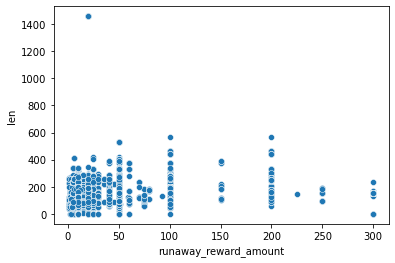

In [30]:
sns.scatterplot(x = 'runaway_reward_amount', y = 'len', data = df);